<a href="https://colab.research.google.com/github/shreyasskasetty/Stock-closing-price-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Description: This program uses an artificial recurrent nueral network
#called Long Short Tern Memory(LSTM) to predict the closing stock price
#of a corporation (Apple Inc.) using past 60 day stock price.

In [25]:
#Importing the libraries required
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
#Get the stock quote
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01',end='2020-08-17')
#Print the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.375000
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,113.010002
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,115.010002


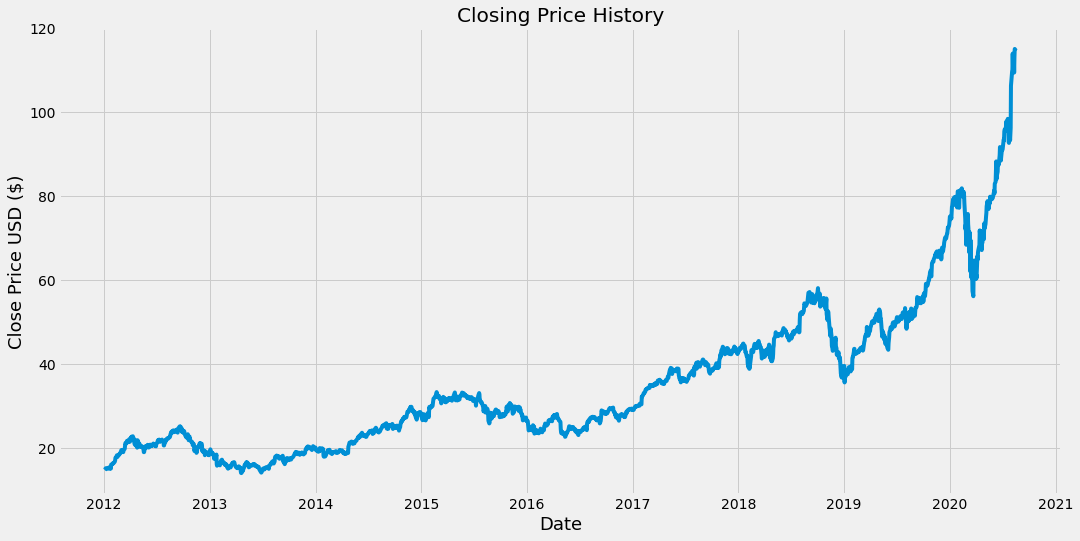

In [27]:
#Ploting the graph for closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values

#get /Compute the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len,dataset

(1736, array([[ 14.6867857 ],
        [ 14.76571465],
        [ 14.92964268],
        ...,
        [115.01000214],
        [114.90750122],
        [114.60749817]]))

In [29]:
# Normalise the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00731513],
       [0.00809612],
       [0.00971817],
       ...,
       [1.        ],
       [0.99898577],
       [0.99601728]])

In [30]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
# x_train contains 60 elements in each column which are closing price of past 60 days
# y train contains 61st element which is the prediction of corresponding past 60 days of closing prices

x_train = []
y_train = []
for i in range(60,training_data_len):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i])

In [36]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [37]:
#Reshape the data into the shape accepted by LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [39]:
#Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=
               (x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [40]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1676/1676 [==============================] - 47s 28ms/step - loss: 1.5799e-04


In [45]:
#Creating Test Dataset
test_data = scaled_data[training_data_len-60: , :]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len: , :]
#Get all of the rows  from index 1736 to the rest and all of the columns
#(in this case it's only Column 'Close'), so 2170-1736 = 434 rows of data
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [57]:
#convert x_test to a numpy array
x_test = np.array(x_test)

In [61]:
#Reshape the data into the shape accepted by the model
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [66]:
#Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Undo Scaling

In [67]:
#Calculate/ Get the value of RMSE
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

3.4531160832627337

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


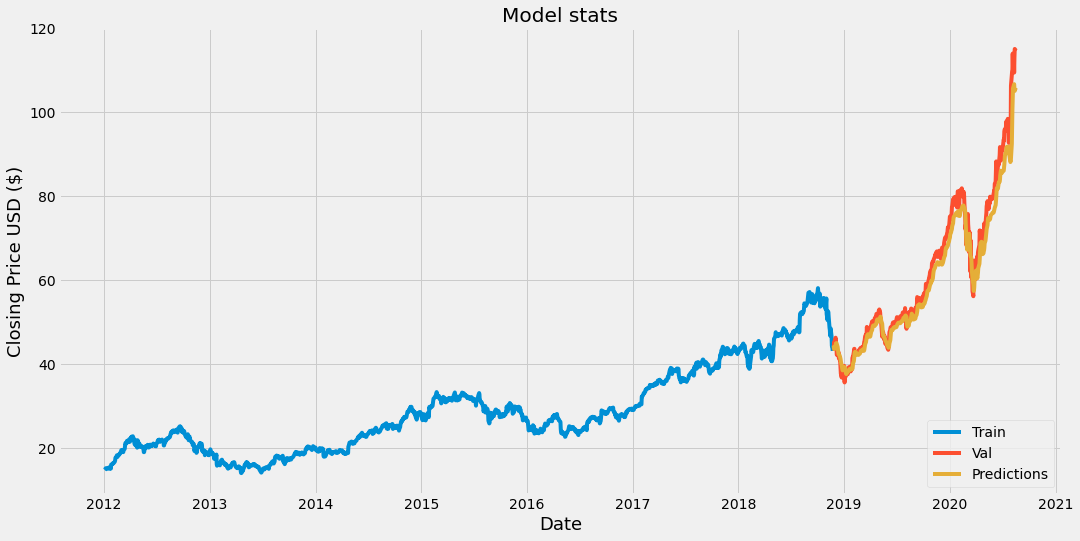

In [70]:
#Plot the data on a graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model stats')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [71]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-08-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[106.03736]]


In [73]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-08-18', end='2020-08-18')
print(apple_quote2['Close'])

Date
2020-08-18    115.5625
Name: Close, dtype: float64
